In [ ]:
# Step 1: Install gdown
# dataset link https://drive.google.com/file/d/151WCGYkscpJAlTclNljqt9K2p_-bMkZd/view?usp=drive_link
!pip install gdown

# Step 2: Download the file from Google Drive
import gdown

# Google Drive file ID
file_id = '151WCGYkscpJAlTclNljqt9K2p_-bMkZd'
# URL to download the file
download_url = f'https://drive.google.com/uc?id=151WCGYkscpJAlTclNljqt9K2p_-bMkZd'
# Output path for the downloaded file
output_path = '/content/yourfile.zip'

# Download the file
gdown.download(download_url, output_path, quiet=False)

# Step 3: Unzip the file
import zipfile
import os

# Path to the zip file
zip_path = '/content/yourfile.zip'
# Directory where you want to unzip the file
extract_path = '/content/dataset'

# Create the directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed.")


Downloading...
From (original): https://drive.google.com/uc?id=151WCGYkscpJAlTclNljqt9K2p_-bMkZd
From (redirected): https://drive.google.com/uc?id=151WCGYkscpJAlTclNljqt9K2p_-bMkZd&confirm=t&uuid=ab71e603-d40e-46ef-b641-f8d5c5c81ebd
To: /content/yourfile.zip
100%|██████████| 948M/948M [00:24<00:00, 38.3MB/s]


Unzipping completed.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/ForestFireDataset/train',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2947 files belonging to 2 classes.


In [ ]:
class_names=dataset.class_names
class_names

['fire', 'nofire']

In [ ]:
len(dataset)

93

In [ ]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for image_batch, label in dataset.take(1):
    print(image_batch.shape)
    print(label.numpy())

(32, 256, 256, 3)
[1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1]


[[[  0.6875  11.6875  12.1875]
  [  0.      11.5     11.    ]
  [  0.      15.3125  13.3125]
  ...
  [194.     179.     146.    ]
  [193.     178.     145.    ]
  [192.     177.     144.    ]]

 [[  0.5     11.0625  11.5625]
  [  0.      11.9375  11.4375]
  [  0.      12.0625  10.0625]
  ...
  [195.     179.     146.    ]
  [194.875  178.875  145.875 ]
  [193.875  177.875  144.875 ]]

 [[  0.      11.      11.    ]
  [  0.      12.      12.    ]
  [  0.      11.9375  10.5   ]
  ...
  [195.     179.     146.    ]
  [195.     179.     146.    ]
  [194.     178.     145.    ]]

 ...

 [[  0.      13.5     13.5   ]
  [  2.5625  16.5625  17.5625]
  [  0.      14.      15.    ]
  ...
  [  2.1875  14.4375  14.4375]
  [  0.      10.9375  10.9375]
  [  0.      11.625   11.625 ]]

 [[  0.      14.75    14.75  ]
  [  0.      11.875   12.875 ]
  [  0.      11.625   12.625 ]
  ...
  [  0.      11.875   11.875 ]
  [  0.      10.875   10.875 ]
  [  0.      10.5     10.5   ]]

 [[  2.4375  18.875   20

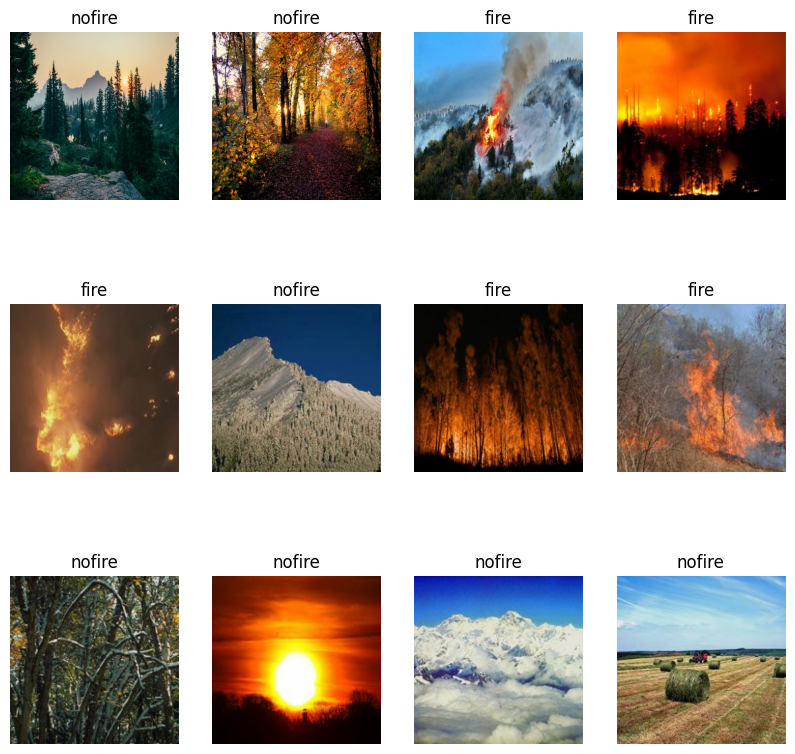

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].shape)
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(class_names[label[i].numpy()])
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis("off")


In [ ]:
len(dataset)

93

In [ ]:
train_size=0.8
len(dataset)*train_size

74.4

In [ ]:
train_ds=dataset.take(74)
len(train_ds)

74

In [ ]:
test_ds=dataset.skip(74)
len(test_ds)

19

In [ ]:
val_size=0.1
len(dataset)*val_size

9.3

In [ ]:
val_ds=test_ds.take(9)
len(val_ds)

9

In [ ]:
test_ds=test_ds.skip(9)
len(test_ds)

10

In [ ]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds


In [ ]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)

In [ ]:
len(train_ds)


74

In [ ]:
len(val_ds)

9

In [ ]:
len(test_ds)

10

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=2
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, None)    0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, None)    0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
74/74 [==============================] - 334s 5s/step - loss: 0.4272 - accuracy: 0.8247 - val_loss: 0.4218 - val_accuracy: 0.8576
Epoch 2/5
74/74 [==============================] - 294s 4s/step - loss: 0.3323 - accuracy: 0.8935 - val_loss: 0.2731 - val_accuracy: 0.9028
Epoch 3/5
74/74 [==============================] - 294s 4s/step - loss: 0.2585 - accuracy: 0.9166 - val_loss: 0.2177 - val_accuracy: 0.9306
Epoch 4/5
74/74 [==============================] - ETA: 0s - loss: 0.2457 - accuracy: 0.9171

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 221ms/step - loss: 0.0325 - accuracy: 0.9883


In [ ]:
scores

[0.03248310834169388, 0.98828125]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

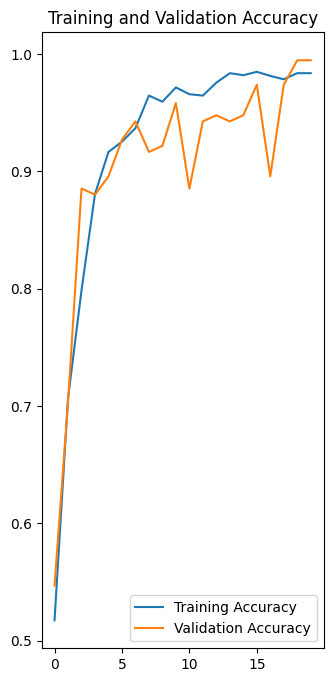

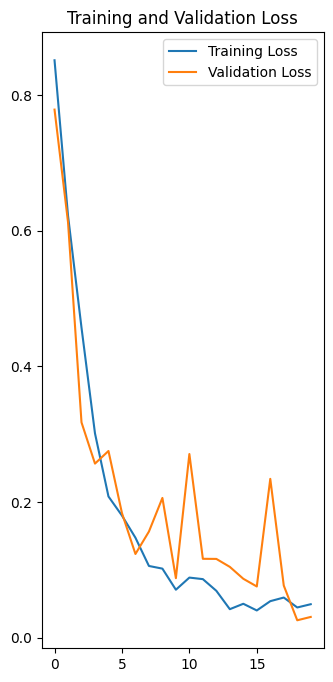

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
for images_batch,label_batch in test_ds.take(1):
    shuffle=True
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("Pridiction:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    pridicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return pridicted_class,confidence

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}")
        plt.axis("off")

In [ ]:
# model_version=1
# model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models/")+[0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2/assets


INFO:tensorflow:Assets written to: ../models/2/assets
